# Thyroid Disease - Data Analysis

## Project Description:
Thyroid nodules are not uncommon whose incidence is increasing globally and the most common one is hypothyroidism. In hypothyroidism, the thyroid gland is underperforming or producing too little thyroid hormone. 

In its early stages, hypothyroidism may not cause any noticeable symptoms. Over time, untreated hypothyroidism can lead to cause a number of health problems, such as obesity, joint pain, infertility and heart disease. So it is important to recognize the symptoms of hypothyroidism and early detection and treatment.

The thyroid gland is located at the front of the neck. It secretes two hormones known as thyroxine (T4) and tri-iodothyronine (T3). The release of T4 and T3 into the blood is controlled by a third hormone called thyroid stimulating hormone (TSH), this hormone is responsible for keeping FT4 and FT3 at the right levels. Collectively, these three hormones are referred to as ‘thyroid function tests’ (TFTs).

The project will analyse the personal information and their hormonal indicators of the thyroid to detect whether they have hypothyroidism disease, using data to speak for itself. It is divided into three steps, project preparation - first introduction to the data - data analysis.  
- The project preparation section imports the modules used and loads the data
- The first look at the data section looks at the basic information and descriptive statistical characteristics of the data
- The Data Analysis section analyses the types of Thyroid gland and distinguishing hyperthyroid and hypothyroid

<img src="https://i.imgur.com/5cW3lGZ.gif?noredirect" width="800px">

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

# Read dataset

In [163]:
# read dataset
data = pd.read_csv('Dataset_edited/new_data.csv')

In [164]:
data.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Target
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,4.10,2.0,102.0,NaN,NaN,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,0.98,NaN,109.0,0.91,120.0,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,0.16,1.9,175.0,NaN,NaN,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,negative
5,18.0,F,t,f,f,f,f,f,f,f,f,f,f,0.03,NaN,183.0,1.30,141.0,negative
6,59.0,F,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,72.0,0.92,78.0,negative
7,80.0,F,f,f,f,f,f,f,f,f,f,f,f,2.20,0.6,80.0,0.70,115.0,negative
8,66.0,F,f,f,f,f,f,f,f,f,f,f,t,0.60,2.2,123.0,0.93,132.0,negative
9,68.0,M,f,f,f,f,f,f,f,f,f,f,f,2.40,1.6,83.0,0.89,93.0,negative


In [165]:
data.shape

(25453, 19)

# Univariate data analysis

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25453 entries, 0 to 25452
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        21577 non-null  float64
 1   sex                        24830 non-null  object 
 2   on_thyroxine               25453 non-null  object 
 3   query_on_thyroxine         25453 non-null  object 
 4   on_antithyroid_medication  25453 non-null  object 
 5   sick                       25453 non-null  object 
 6   pregnant                   25453 non-null  object 
 7   thyroid_surgery            25453 non-null  object 
 8   query_hypothyroid          25453 non-null  object 
 9   query_hyperthyroid         25453 non-null  object 
 10  lithium                    25453 non-null  object 
 11  goitre                     25453 non-null  object 
 12  tumor                      25453 non-null  object 
 13  TSH                        20097 non-null  flo

### Data infomation
1. The size: 3.7+ MB
2. 25453 instances
3. 19 columns

## Data set description:
<!-- * Kaggle[Data sets provided](https://www.kaggle.com/datasets/yasserhessein/thyroid-disease-data-set)
From Garavan Institute
Documentation: as given by Ross Quinlan
6 databases from the Garavan Institute in Sydney, Australia
Approximately the following for each database:

2800 training (data) instances and 972 test instances
Plenty of missing data
29 or so attributes, either Boolean or continuously-valued

The various hormonal indicators and personal information are saved in a CSV file format. -->

* Data Dictionary
    * **age**: continous, float64
    * **sex**: Femal(F) or Male(M)
    * **on thyroxine**: t/f
    * **query on thyroxine**: t/f
    * **on antithyroid medication**: t/f
    * **sick**: t/f
    * **pregnant**: t/f
    * **thyroid surgery**: t/f
    * **I131 treatment**: t/f
    * **query hypothyroid**: t/f
    * **query hyperthyroid**: t/f
    * **lithium**: t/f
    * **goitre**: t/f
    * **tumor**: t/f
    * **TSH**: Thyroid Stimulating Hormone, float64
    * **T3**: Triiodothyronine which is a hormone that the thyroid gland produces, float64
    * **TT4**: Thyroxine which is a type of thyroid hormone that regulates metabolism, float64
    * **T4U**: , float64
    * **FTI**: Free T4 Index, float64
    * **Target**: negative, hyperthyroid, hypothyroid

In [167]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,21577.000000,20097.000000,17583.000000,20960.000000,20327.000000,20339.000000
mean,60.813204,4.447303,2.006617,89.779328,2.641054,92.766267
std,772.129005,22.711850,0.831331,49.526017,3.574042,53.518300
min,1.000000,0.000000,0.000000,0.200000,0.000000,0.000000
25%,36.000000,0.189000,1.600000,69.000000,0.890000,73.000000
50%,54.000000,0.920000,2.000000,96.000000,1.010000,101.000000
75%,67.000000,2.300000,2.300000,118.000000,1.210000,120.000000
max,65526.000000,530.000000,18.000000,450.000000,23.200000,881.000000


## Handle Missing Value

In [168]:
data.isnull().sum()

age                          3876
sex                           623
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
TSH                          5356
T3                           7870
TT4                          4493
T4U                          5126
FTI                          5114
Target                          0
dtype: int64

### _age_ missing value

In [169]:
(data.shape[0]-data['age'].count())/data.shape[0]

0.15228067418378974

In [170]:
data.groupby(['age'])[['Target']].count()

,Target
age,
1.0,34
2.0,19
3.0,2
4.0,5
5.0,5
...,...
98.0,1
455.0,3
65511.0,1


It is impossible that age is more than 100. Therefore, delete these data

In [171]:
data = data.drop(data[data['age']>100].index)

In [172]:
data.shape

(25447, 19)

In [173]:
data[data['age'].isna()].count()

age                             0
sex                          3820
on_thyroxine                 3876
query_on_thyroxine           3876
on_antithyroid_medication    3876
sick                         3876
pregnant                     3876
thyroid_surgery              3876
query_hypothyroid            3876
query_hyperthyroid           3876
lithium                      3876
goitre                       3876
tumor                        3876
TSH                           406
T3                            389
TT4                           419
T4U                           419
FTI                           419
Target                       3876
dtype: int64

In [174]:
data.groupby(['age'])[['Target']].count()

,Target
age,
1.0,34
2.0,19
3.0,2
4.0,5
5.0,5
...,...
93.0,10
94.0,8
95.0,1


In [175]:
data.age.count()

21571

1. The missing rate is: 1.76%
2. The number of missing value: 448
3. The number of non-missing value: 25005

### _Sex_ missing value

In [176]:
(data.shape[0]-data['sex'].count())/data.shape[0]

0.02448225724053916

In [177]:
data[data['sex'].isna()].count()

age                          567
sex                            0
on_thyroxine                 623
query_on_thyroxine           623
on_antithyroid_medication    623
sick                         623
pregnant                     623
thyroid_surgery              623
query_hypothyroid            623
query_hyperthyroid           623
lithium                      623
goitre                       623
tumor                        623
TSH                          553
T3                           491
TT4                          571
T4U                          549
FTI                          549
Target                       623
dtype: int64

In [178]:
data.sex.count()

24824

In [179]:
data.groupby(['sex'])[['Target']].count()

,Target
sex,
F,17047
M,7777


1. The missing rate is: 2.448%
2. The number of missing value: 623
3. The number of non-missing value: 24824 (17047 Female and 7777 Male)

### _TSH_ Missing Value

In [180]:
(data.shape[0]-data['TSH'].count())/data.shape[0]

0.2104766770149723

In [181]:
data[data['TSH'].isna()].count()

age                          1886
sex                          5286
on_thyroxine                 5356
query_on_thyroxine           5356
on_antithyroid_medication    5356
sick                         5356
pregnant                     5356
thyroid_surgery              5356
query_hypothyroid            5356
query_hyperthyroid           5356
lithium                      5356
goitre                       5356
tumor                        5356
TSH                             0
T3                            457
TT4                           985
T4U                           958
FTI                           958
Target                       5356
dtype: int64

In [182]:
data.TSH.count()

20091

1. TSH missing rate: 7.577%
2. TSH missed 1928 instances
3. Non-missing: 23519 instances

### _T3_ Missing Value

In [183]:
(data.shape[0]-data['T3'].count())/data.shape[0]

0.30923095060321454

In [184]:
data[data['T3'].isna()].count()

age                          4382
sex                          7737
on_thyroxine                 7869
query_on_thyroxine           7869
on_antithyroid_medication    7869
sick                         7869
pregnant                     7869
thyroid_surgery              7869
query_hypothyroid            7869
query_hyperthyroid           7869
lithium                      7869
goitre                       7869
tumor                        7869
TSH                          2970
T3                              0
TT4                          3524
T4U                          3510
FTI                          3511
Target                       7869
dtype: int64

In [185]:
data.T3.count()

17578

1. T3 missing rate: 17.452%
2. T3 missed 4441 instances
3. Non-missing: 21006 instances

### _TT4_ Missing Value

In [186]:
(data.shape[0]-data['TT4'].count())/data.shape[0]

0.17656305261916924

In [187]:
data[data['TT4'].isna()].count()

age                          1036
sex                          4441
on_thyroxine                 4493
query_on_thyroxine           4493
on_antithyroid_medication    4493
sick                         4493
pregnant                     4493
thyroid_surgery              4493
query_hypothyroid            4493
query_hyperthyroid           4493
lithium                      4493
goitre                       4493
tumor                        4493
TSH                           122
T3                            148
TT4                             0
T4U                             9
FTI                            17
Target                       4493
dtype: int64

In [188]:
data.TT4.count()

20954

1. TT4 missing rate: 4.185%
2. TT4 missed 1065 instances
3. Non-missing: 24382 instances

### _T4U_ Missing Value

In [189]:
(data.shape[0]-data['T4U'].count())/data.shape[0]

0.20143828349117773

In [190]:
data[data['T4U'].isna()].count()

age                          1669
sex                          5052
on_thyroxine                 5126
query_on_thyroxine           5126
on_antithyroid_medication    5126
sick                         5126
pregnant                     5126
thyroid_surgery              5126
query_hypothyroid            5126
query_hyperthyroid           5126
lithium                      5126
goitre                       5126
tumor                        5126
TSH                           728
T3                            767
TT4                           642
T4U                             0
FTI                            13
Target                       5126
dtype: int64

In [191]:
data.T4U.count()

20321

1. T4U missing rate: 6.673%
2. T4U missed 1698 instances
3. Non-missing: 23749 instances

### _FTI_ Missing Value

In [192]:
(data.shape[0]-data['FTI'].count())/data.shape[0]

0.20096671513341455

In [193]:
data[data['FTI'].isna()].count()

age                          1657
sex                          5040
on_thyroxine                 5114
query_on_thyroxine           5114
on_antithyroid_medication    5114
sick                         5114
pregnant                     5114
thyroid_surgery              5114
query_hypothyroid            5114
query_hyperthyroid           5114
lithium                      5114
goitre                       5114
tumor                        5114
TSH                           716
T3                            756
TT4                           638
T4U                             1
FTI                             0
Target                       5114
dtype: int64

In [194]:
data.FTI.count()

20333

1. FTI missing rate: 6.626%
2. FTI missed 1686 instances
3. Non-missing: 23761 instances

# How to handle the missing value!?....???????

In [195]:
# miss_cols = ['TSH','T3','TT4','T4U','FTI']
# for i in miss_cols:
#     data[i] = data[i].fillna(data[i].mean())

In [196]:
# # Delete the null value in age and sex
# thyroid_df.dropna(inplace=True)

In [197]:
data.isnull().sum()

age                          3876
sex                           623
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
TSH                          5356
T3                           7869
TT4                          4493
T4U                          5126
FTI                          5114
Target                          0
dtype: int64

# Data Distribution

### Statistical infomation

In [198]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,21571.000000,20091.000000,17578.000000,20954.000000,20321.000000,20333.000000
mean,51.655116,4.448372,2.006573,89.771104,2.641522,92.760296
std,18.891287,22.715155,0.831427,49.530599,3.574465,53.524617
min,1.000000,0.000000,0.000000,0.200000,0.000000,0.000000
25%,36.000000,0.189000,1.600000,69.000000,0.890000,73.000000
50%,54.000000,0.920000,2.000000,96.000000,1.010000,101.000000
75%,67.000000,2.300000,2.300000,118.000000,1.210000,120.000000
max,98.000000,530.000000,18.000000,450.000000,23.200000,881.000000


### positive(hypothyroid, hyperthyroid) vs Negative label

The number of target：
negative        23594
hypothyroid      1403
hyperthyroid      450
Name: Target, dtype: int64


Text(0.5, 1.0, 'Distribution for Target variable')

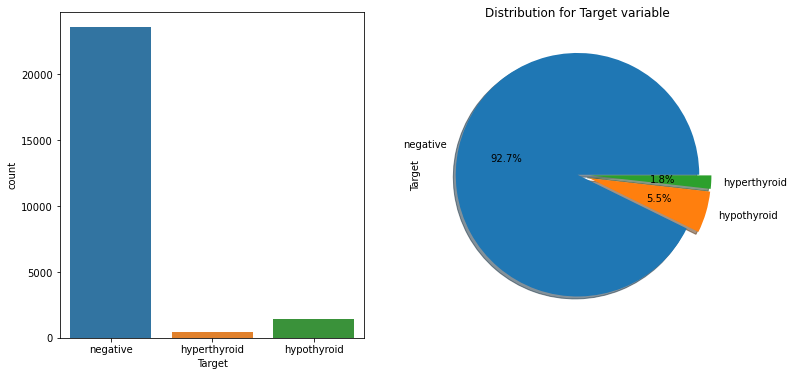

In [199]:
print('The number of target：')
print(data.Target.value_counts())

_,axe = plt.subplots(1,2,figsize=(12,6))
sns.countplot('Target',data=data,ax=axe[0])
data.Target.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1,0.1],ax=axe[1])
plt.title("Distribution for Target variable")

As can be seen from the above graph, the distribution of samples is uneven and certain measures are needed to deal with the sample imbalance:

- Similar to undersampling, a positive sample and a negative sample are combined to form a multi-sample training set, and multiple models are trained and averaged
- Adjusting the weights of the model

### Distribution for other variables of positive class

In [200]:
positive_df = data.loc[data.Target.isin(['hyperthyroid','hypothyroid'])]

Text(0.5, 1.0, 'Distribution of Positive Class Based on Age')

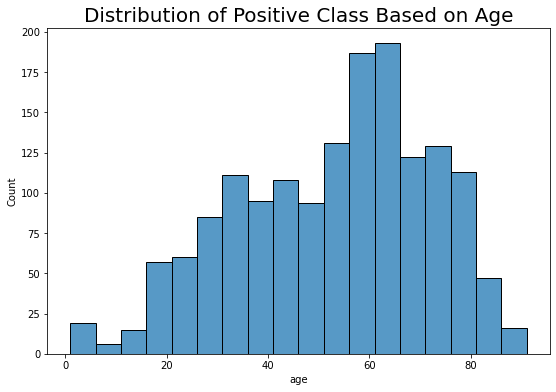

In [201]:
plt.figure(figsize=(9,6))
sns.histplot(x='age',data=positive_df)
plt.title("Distribution of Positive Class Based on Age", {'fontsize':20})

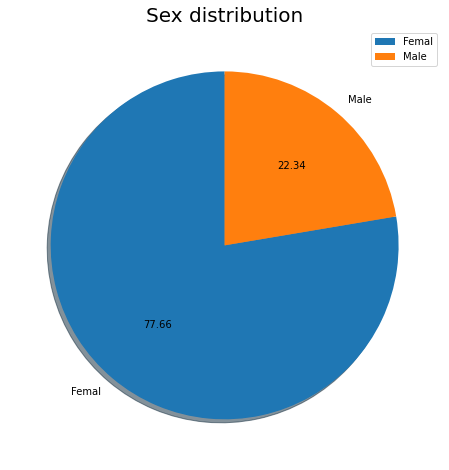

In [202]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sex.value_counts(), labels=['Female','Male'], startangle=90,autopct='%.2f',shadow=True)
plt.title("Sex distribution", {'fontsize':20})
plt.legend()

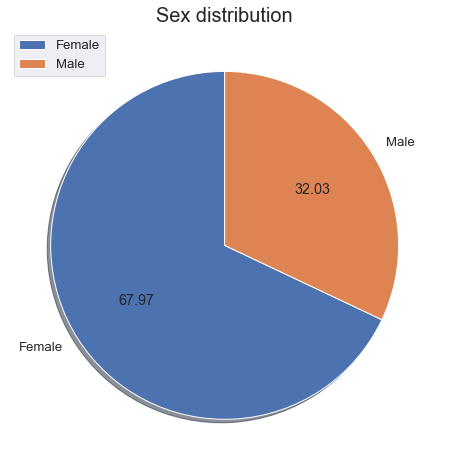

In [237]:
negative_df = data.loc[data.Target.isin(['negative'])]

plt.figure(figsize=(8,8))
plt.pie(x=negative_df.sex.value_counts(), labels=['Female','Male'], startangle=90,autopct='%.2f',shadow=True)
plt.title("Sex distribution", {'fontsize':20})
plt.legend()

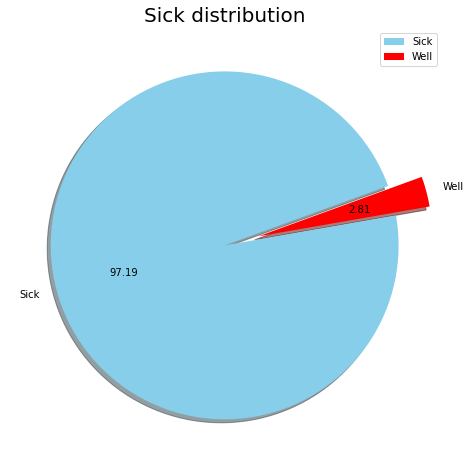

In [205]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sick.value_counts(),labels=['Sick','Well'],autopct='%.2f',startangle=20,colors=['skyblue','red'],shadow=True,explode=[0,0.2])
plt.title("Sick distribution", {'fontsize':20})
plt.legend()

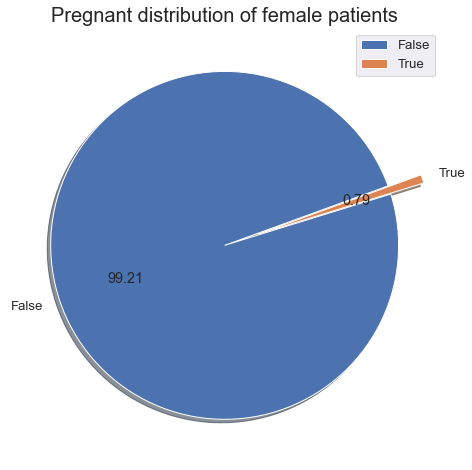

In [239]:
female_df = positive_df[positive_df.sex == 'F']
# female_df = data[data.sex == 'F']
plt.figure(figsize=(8,8))
plt.pie(x=female_df.pregnant.value_counts(), labels=['False','True'], startangle=20,autopct='%.2f',shadow=True,explode=[0,0.2])
plt.title("Pregnant distribution of female patients", {'fontsize':20})
plt.legend()

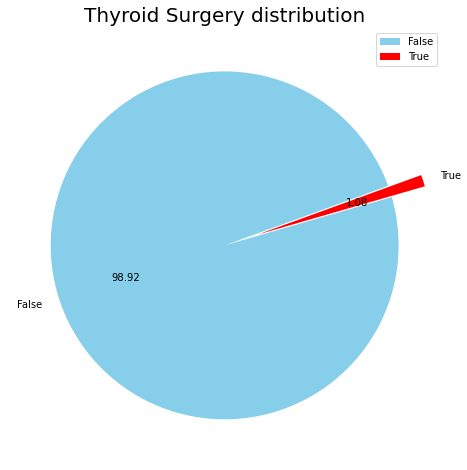

In [208]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df['thyroid_surgery'].value_counts(),labels=['False','True'],autopct='%.2f',startangle=20,colors=['skyblue','red'],explode=[0,0.2])
plt.title("Thyroid Surgery distribution", {'fontsize':20})
plt.legend()

#### Results:
- The age distribution is mainly between 20-80, especially around 60
- The number of Female patients who has thyroid disease is extremely greater than male patients.
- Only 2.81% patients do not feel sick, which means there is no symptoms
- Only 0.79% femal patients have pregnant
- 1.08% patients had thyroid surgery before, but they still have thyroid gland disease

## Parameter Analysis

In [212]:
para_cols = ['TSH','T3','TT4','T4U','FTI']

### Hyperthyroid parameter distribution 

In [213]:
hyper_df =  data.loc[data.Target.isin(['hyperthyroid'])]

In [216]:
# Parameter distribution
print('Hyperthyroid parameters distribution:')
hyper_mean_para = hyper_df[para_cols].mean()
print(hyper_mean_para)

Hyperthyroid parameters distribution:
TSH      3.113533
T3       3.424756
TT4    143.124748
T4U      3.321135
FTI    159.392614
dtype: float64


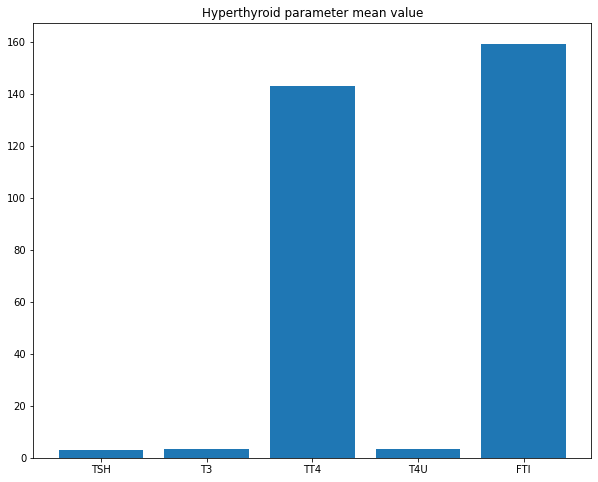

In [217]:
plt.figure(figsize=(10,8))
index = np.arange(len(hyper_mean_para.index))
plt.bar(para_cols, hyper_mean_para)
plt.xticks(index, hyper_mean_para.index)
plt.title('Hyperthyroid parameter mean value')
plt.show()

### Hypothyroid parameter distribution

In [219]:
hypo_df = data.loc[data.Target.isin(['hypothyroid'])]

In [220]:
# Parameter distribution
print('Hypothyroid parameters distribution:')
hypo_mean_para = hypo_df[para_cols].mean()
print(hypo_mean_para)

Hypothyroid parameters distribution:
TSH    39.049346
T3      1.470100
TT4    56.453447
T4U     2.501763
FTI    55.798406
dtype: float64


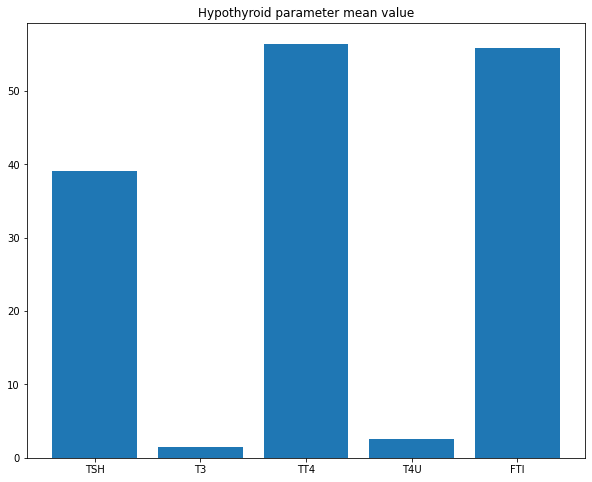

In [221]:
plt.figure(figsize=(10,8))
index = np.arange(len(hypo_mean_para.index))
plt.bar(para_cols, hypo_mean_para)
plt.xticks(index, hypo_mean_para.index)
plt.title('Hypothyroid parameter mean value')
plt.show()

### Negative parameter distribution

In [222]:
negative_df = data.loc[data.Target.isin(['negative'])]

In [223]:
# Parameter distribution
print('Negative parameters distribution:')
negative_mean_para = negative_df[para_cols].mean()
print(negative_mean_para)

Negative parameters distribution:
TSH     2.187329
T3      2.011028
TT4    90.817667
T4U     2.636746
FTI    93.725354
dtype: float64


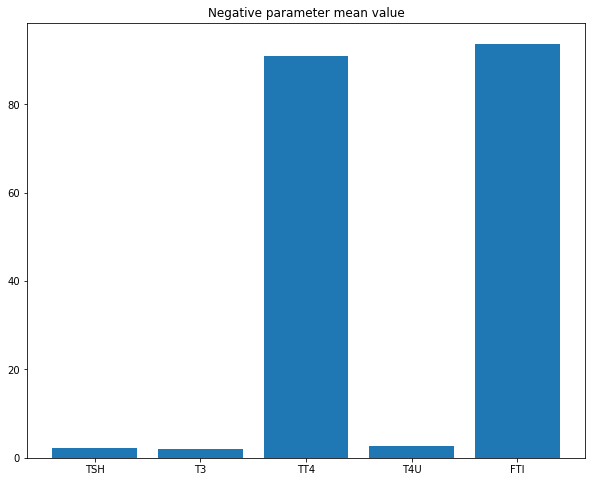

In [224]:
plt.figure(figsize=(10,8))
index = np.arange(len(negative_mean_para.index))
plt.bar(para_cols, negative_mean_para)
plt.xticks(index, negative_mean_para.index)
plt.title('Negative parameter mean value')
plt.show()

In [227]:
%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

Text(0.5, 1.0, 'Distribution of TSH value')

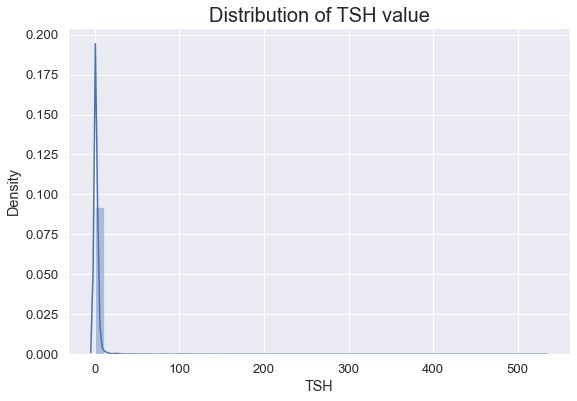

In [229]:
plt.figure(figsize=(9,6))
sns.distplot(negative_df['TSH'])
plt.title("Distribution of TSH value", {'fontsize':20})

Text(0.5, 1.0, 'Distribution of T3 value')

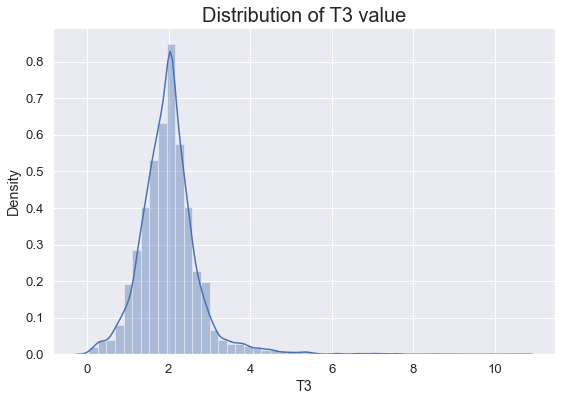

In [230]:
plt.figure(figsize=(9,6))
sns.distplot(negative_df['T3'])
plt.title("Distribution of T3 value", {'fontsize':20})

Text(0.5, 1.0, 'Distribution of TT4 value')

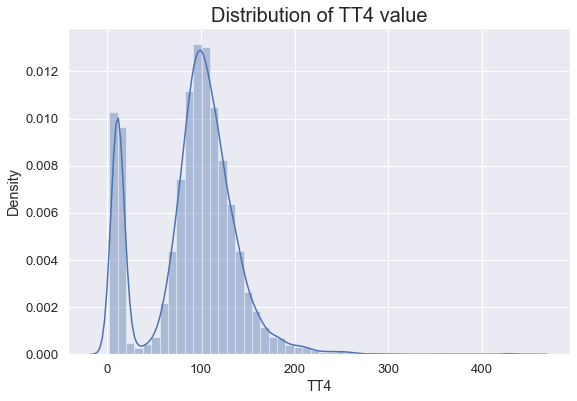

In [232]:
plt.figure(figsize=(9,6))
sns.distplot(negative_df['TT4'])
plt.title("Distribution of TT4 value", {'fontsize':20})

Text(0.5, 1.0, 'Distribution of T4U value')

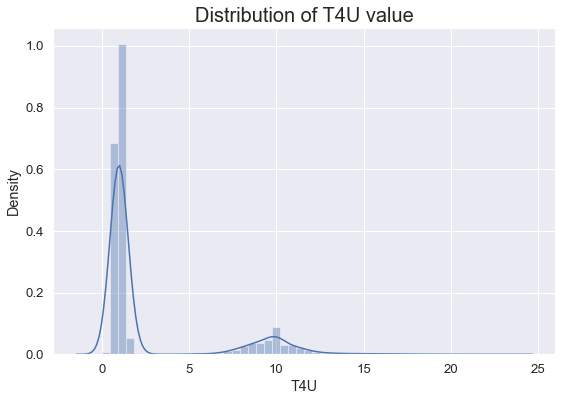

In [234]:
plt.figure(figsize=(9,6))
sns.distplot(negative_df['T4U'])
plt.title("Distribution of T4U value", {'fontsize':20})

Text(0.5, 1.0, 'Distribution of FTI value')

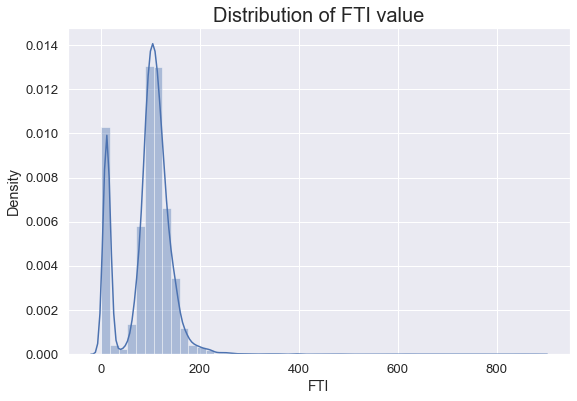

In [235]:
plt.figure(figsize=(9,6))
sns.distplot(negative_df['FTI'])
plt.title("Distribution of FTI value", {'fontsize':20})